# Serial row-reordering experiments

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Dimension/density grid search

metadata_row_range = [50, 100, 200, 500, 1000]
density_pct_range = [1, 2, 5, 10, 20, 30]

num_md_rows = len(metadata_row_range)
num_dens_vals = len(density_pct_range)
metadata_row_range = np.array(metadata_row_range)
density_pct_range = np.array(density_pct_range)

result_metadata_row = np.zeros((num_dens_vals,num_md_rows))
result_density_pct = np.zeros((num_dens_vals,num_md_rows))
result_time = np.zeros((num_dens_vals,num_md_rows))

In [7]:
for rdx in range(num_md_rows):
    for ddx in range(num_dens_vals):
        metadata_rows = metadata_row_range[rdx]
        density_pct = density_pct_range[ddx]
        
        result_metadata_row[ddx,rdx] = metadata_rows
        result_density_pct[ddx,rdx] = density_pct
        
        print("Density:", density_pct,"% Rows:",metadata_rows)
        cli = "./rcsr " + str(metadata_rows) + " " + str(metadata_rows) + " " + str(density_pct) + "; ./sre < mat.csr > time.txt"
        os.system(cli)
        
        rt = 0
        with open('time.txt') as f:
            rt = f.readlines()
        
        result_time[ddx,rdx] = int(rt[0].strip())

Density: 1 % Rows: 50
- Allocating CSR memory.
- CSR preview (50 rows, 50 columns, 37 edges, density 1%):
-- Vertices:
vertices[0] == 0 
vertices[1] == 1 
vertices[2] == 2 
vertices[3] == 2 
vertices[4] == 2 

...

vertices[46] == 33 
vertices[47] == 35 
vertices[48] == 36 
vertices[49] == 36 
vertices[50] == 37 
-- Edges and values:
edges[0] == 18 values[0] == 1.000000
edges[1] == 1 values[1] == 1.000000
edges[2] == 6 values[2] == 1.000000
edges[3] == 10 values[3] == 1.000000
edges[4] == 49 values[4] == 1.000000

...

edges[32] == 47 values[32] == 1.000000
edges[33] == 1 values[33] == 1.000000
edges[34] == 46 values[34] == 1.000000
edges[35] == 28 values[35] == 1.000000
edges[36] == 14 values[36] == 1.000000
Saving CSR representation to file.
- Writing metadata line.
- Writing vertices.
- Writing edges.
- Writing values.
Density: 2 % Rows: 50
- Allocating CSR memory.
- CSR preview (50 rows, 50 columns, 54 edges, density 2%):
-- Vertices:
vertices[0] == 0 
vertices[1] == 1 
vertices[2]

- Allocating CSR memory.
- CSR preview (200 rows, 200 columns, 842 edges, density 2%):
-- Vertices:
vertices[0] == 0 
vertices[1] == 3 
vertices[2] == 9 
vertices[3] == 14 
vertices[4] == 15 

...

vertices[196] == 826 
vertices[197] == 832 
vertices[198] == 836 
vertices[199] == 838 
vertices[200] == 842 
-- Edges and values:
edges[0] == 18 values[0] == 1.000000
edges[1] == 51 values[1] == 1.000000
edges[2] == 125 values[2] == 1.000000
edges[3] == 26 values[3] == 1.000000
edges[4] == 56 values[4] == 1.000000

...

edges[837] == 186 values[837] == 1.000000
edges[838] == 67 values[838] == 1.000000
edges[839] == 73 values[839] == 1.000000
edges[840] == 83 values[840] == 1.000000
edges[841] == 143 values[841] == 1.000000
Saving CSR representation to file.
- Writing metadata line.
- Writing vertices.
- Writing edges.
- Writing values.
Density: 5 % Rows: 200
- Allocating CSR memory.
- CSR preview (200 rows, 200 columns, 1977 edges, density 5%):
-- Vertices:
vertices[0] == 0 
vertices[1] == 

Density: 30 % Rows: 500
- Allocating CSR memory.
- CSR preview (500 rows, 500 columns, 75114 edges, density 30%):
-- Vertices:
vertices[0] == 0 
vertices[1] == 154 
vertices[2] == 288 
vertices[3] == 411 
vertices[4] == 548 

...

vertices[496] == 74503 
vertices[497] == 74661 
vertices[498] == 74794 
vertices[499] == 74965 
vertices[500] == 75114 
-- Edges and values:
edges[0] == 0 values[0] == 1.000000
edges[1] == 15 values[1] == 1.000000
edges[2] == 17 values[2] == 1.000000
edges[3] == 20 values[3] == 1.000000
edges[4] == 21 values[4] == 1.000000

...

edges[75109] == 478 values[75109] == 1.000000
edges[75110] == 481 values[75110] == 1.000000
edges[75111] == 482 values[75111] == 1.000000
edges[75112] == 489 values[75112] == 1.000000
edges[75113] == 496 values[75113] == 1.000000
Saving CSR representation to file.
- Writing metadata line.
- Writing vertices.
- Writing edges.
- Writing values.
Density: 1 % Rows: 1000
- Allocating CSR memory.
- CSR preview (1000 rows, 1000 columns, 9910

In [8]:
import pickle

data = {"metadata_row_range":metadata_row_range, "density_pct_range":density_pct_range, \
        "num_md_rows":num_md_rows, "num_dens_vals":num_dens_vals, \
        "result_metadata_row":result_metadata_row, "result_density_pct":result_density_pct, \
        "result_time":result_time}

# open a file, where you ant to store the data
file = open('serial_experiments_data', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

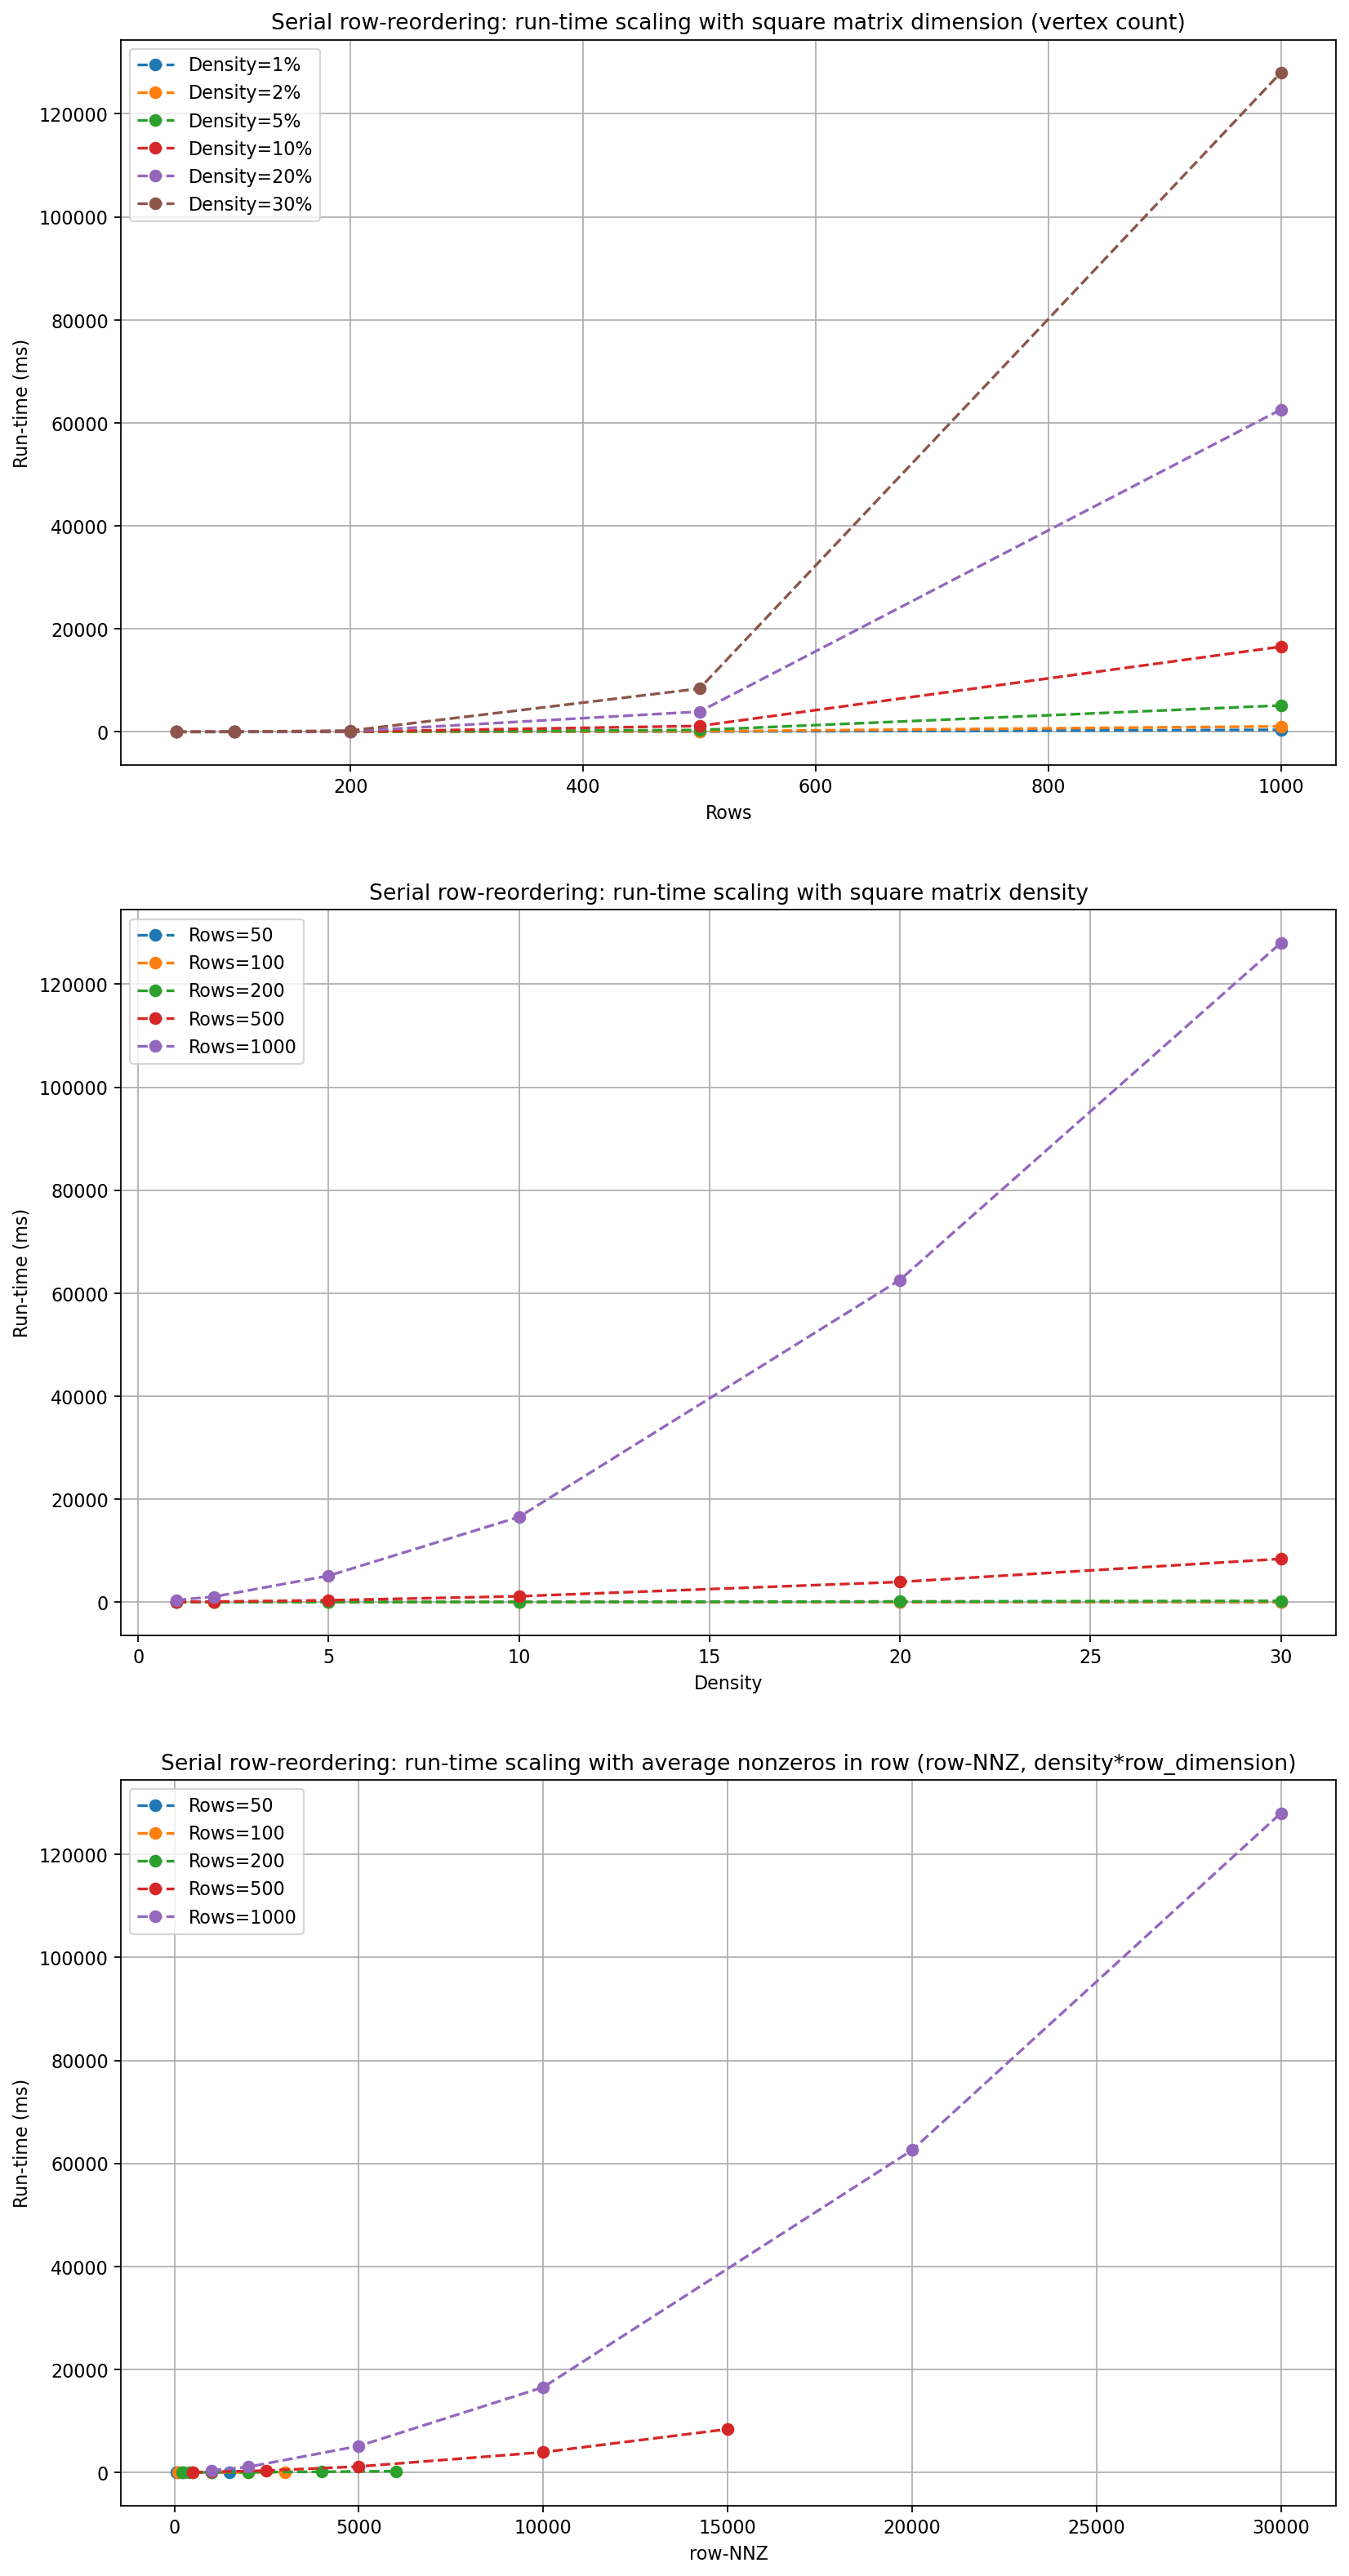

In [9]:
plt.figure(figsize=(12, 25), dpi=160)
plt.subplot(311)
for ddx in range(num_dens_vals):
    plt.plot(result_metadata_row[ddx,:],result_time[ddx,:],'--o')
plt.grid(True)
plt.xlabel('Rows')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with square matrix dimension (vertex count)')
plt.legend(["Density="+str(d)+"%" for d in density_pct_range])

    
plt.subplot(312)
for rdx in range(num_md_rows):
    plt.plot(result_density_pct[:,rdx],result_time[:,rdx],'--o')
plt.grid(True)
plt.xlabel('Density')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with square matrix density')
plt.legend(["Rows="+str(r) for r in metadata_row_range])

plt.subplot(313)
for rdx in range(num_md_rows):
    plt.plot(result_density_pct[:,rdx]*metadata_row_range[rdx],result_time[:,rdx],'--o')
plt.grid(True)
plt.xlabel('row-NNZ')
plt.ylabel('Run-time (ms)')
plt.title('Serial row-reordering: run-time scaling with average nonzeros in row (row-NNZ, density*row_dimension)')
plt.legend(["Rows="+str(r) for r in metadata_row_range])